<a href="https://colab.research.google.com/github/diksha139/newFolder/blob/main/Week3%264_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
from google.colab import files
uploaded = files.upload()

In [55]:
data = pd.read_csv("sales_data_sample.csv",encoding='Unicode_escape')
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [56]:
describe = data.describe().T
describe.style.background_gradient(cmap = "Greens")

,count,mean,std,min,25%,50%,75%,max
ORDERNUMBER,2823.000000,10258.725115,92.085478,10100.000000,10180.000000,10262.000000,10333.500000,10425.000000
QUANTITYORDERED,2823.000000,35.092809,9.741443,6.000000,27.000000,35.000000,43.000000,97.000000
PRICEEACH,2823.000000,83.658544,20.174277,26.880000,68.860000,95.700000,100.000000,100.000000
ORDERLINENUMBER,2823.000000,6.466171,4.225841,1.000000,3.000000,6.000000,9.000000,18.000000
SALES,2823.000000,3553.889072,1841.865106,482.130000,2203.430000,3184.800000,4508.000000,14082.800000
QTR_ID,2823.000000,2.717676,1.203878,1.000000,2.000000,3.000000,4.000000,4.000000
MONTH_ID,2823.000000,7.092455,3.656633,1.000000,4.000000,8.000000,11.000000,12.000000
YEAR_ID,2823.000000,2003.815090,0.699670,2003.000000,2003.000000,2004.000000,2004.000000,2005.000000
MSRP,2823.000000,100.715551,40.187912,33.000000,68.000000,99.000000,124.000000,214.000000


In [57]:
columns  = data.columns
nunique = pd.DataFrame(data[columns].nunique())
nunique.style.background_gradient(cmap="Oranges")

,0
ORDERNUMBER,307
QUANTITYORDERED,58
PRICEEACH,1016
ORDERLINENUMBER,18
SALES,2763
ORDERDATE,252
STATUS,6
QTR_ID,4
MONTH_ID,12
YEAR_ID,3


In [58]:
print("Total Missing Values Numbers of columns;")
isnull = pd.DataFrame(data.isnull().sum())
isnull.style.background_gradient(cmap="ocean")

Total Missing Values Numbers of columns;


,0
ORDERNUMBER,0
QUANTITYORDERED,0
PRICEEACH,0
ORDERLINENUMBER,0
SALES,0
ORDERDATE,0
STATUS,0
QTR_ID,0
MONTH_ID,0
YEAR_ID,0


In [59]:
fig = px.pie(data, names='COUNTRY', title='Country Pie Chart')
fig.show()

In [60]:
addresline2_missing_value_rates = data["ADDRESSLINE2"].isnull().sum() * 100 / len(data)
state_missing_value_rates = data["STATE"].isnull().sum() * 100 / len(data)
terrıtory_missing_value_rates = data["TERRITORY"].isnull().sum() * 100 / len(data)

print("ADDRESSLINE2 missing value rates % : ",round(addresline2_missing_value_rates,3))
print("STATE missing value rates % : ",round(state_missing_value_rates,3))
print("TERRITORY missing value rates % : ",round(terrıtory_missing_value_rates,3))

data = data.drop(["ADDRESSLINE2","STATE","TERRITORY"], axis=1)


ADDRESSLINE2 missing value rates % :  89.302
STATE missing value rates % :  52.639
TERRITORY missing value rates % :  38.045


In [61]:
data["ORDERDATE"] = pd.to_datetime(data["ORDERDATE"])

print("Last date in data:", data["ORDERDATE"].max())
print("First date in data:", data["ORDERDATE"].min())

import datetime as dt
Now = dt.datetime(2005,5,31)

Last date in data: 2005-05-31 00:00:00
First date in data: 2003-01-06 00:00:00


In [62]:
data["recency_day"] = (Now - data["ORDERDATE"]).astype(str)
data[["recency_day", "B"]] = data["recency_day"].str.split(" ",expand = True)
data = data.drop(["B", "ORDERDATE"], axis=1)

<function matplotlib.pyplot.show(close=None, block=None)>

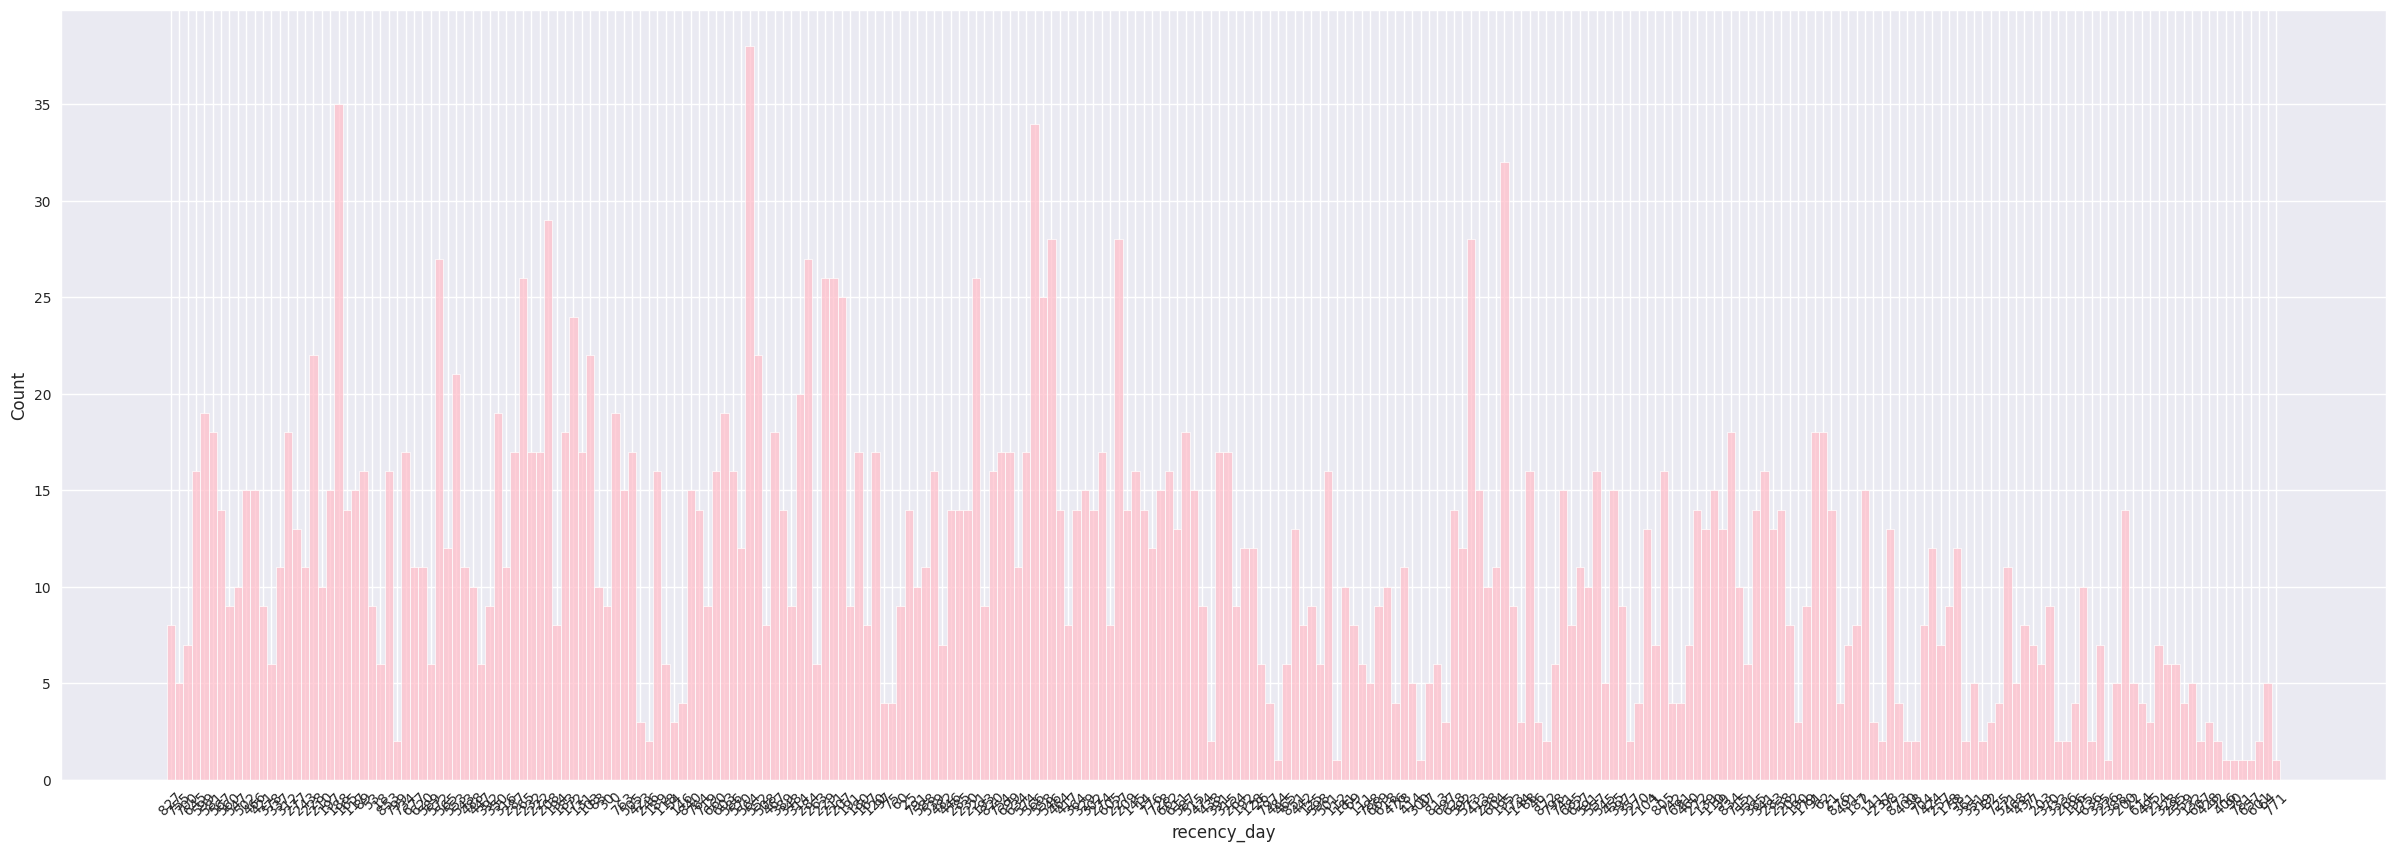

In [63]:
plt.figure(figsize=(30,10))
sns.set_style("darkgrid")
sns.histplot(data['recency_day'], bins=50,
            discrete = True,
            color = "pink")
plt.xticks(rotation=45)
plt.show

In [64]:
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,...,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,recency_day
0,10107,30,95.70,2,2871.00,Shipped,1,2,2003,Motorcycles,...,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small,827
1,10121,34,81.35,5,2765.90,Shipped,2,5,2003,Motorcycles,...,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small,755
2,10134,41,94.74,2,3884.34,Shipped,3,7,2003,Motorcycles,...,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium,700
3,10145,45,83.26,6,3746.70,Shipped,3,8,2003,Motorcycles,...,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium,645
4,10159,49,100.00,14,5205.27,Shipped,4,10,2003,Motorcycles,...,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,San Francisco,NaN,USA,Brown,Julie,Medium,599


In [65]:
import numpy as np
from scipy.stats import kurtosis
from scipy.stats import skew
print( 'excess kurtosis of normal distribution (should be 0): {}'.format( kurtosis(data["SALES"]) ))
print( 'skewness of normal distribution (should be 0): {}'.format( skew(data["SALES"]) ))

excess kurtosis of normal distribution (should be 0): 1.7873782707746377
skewness of normal distribution (should be 0): 1.160458972499323


In [66]:
temp  = pd.DataFrame(data["SALES"]).describe().T
temp.style.background_gradient(cmap="Greens")


,count,mean,std,min,25%,50%,75%,max
SALES,2823.000000,3553.889072,1841.865106,482.130000,2203.430000,3184.800000,4508.000000,14082.800000


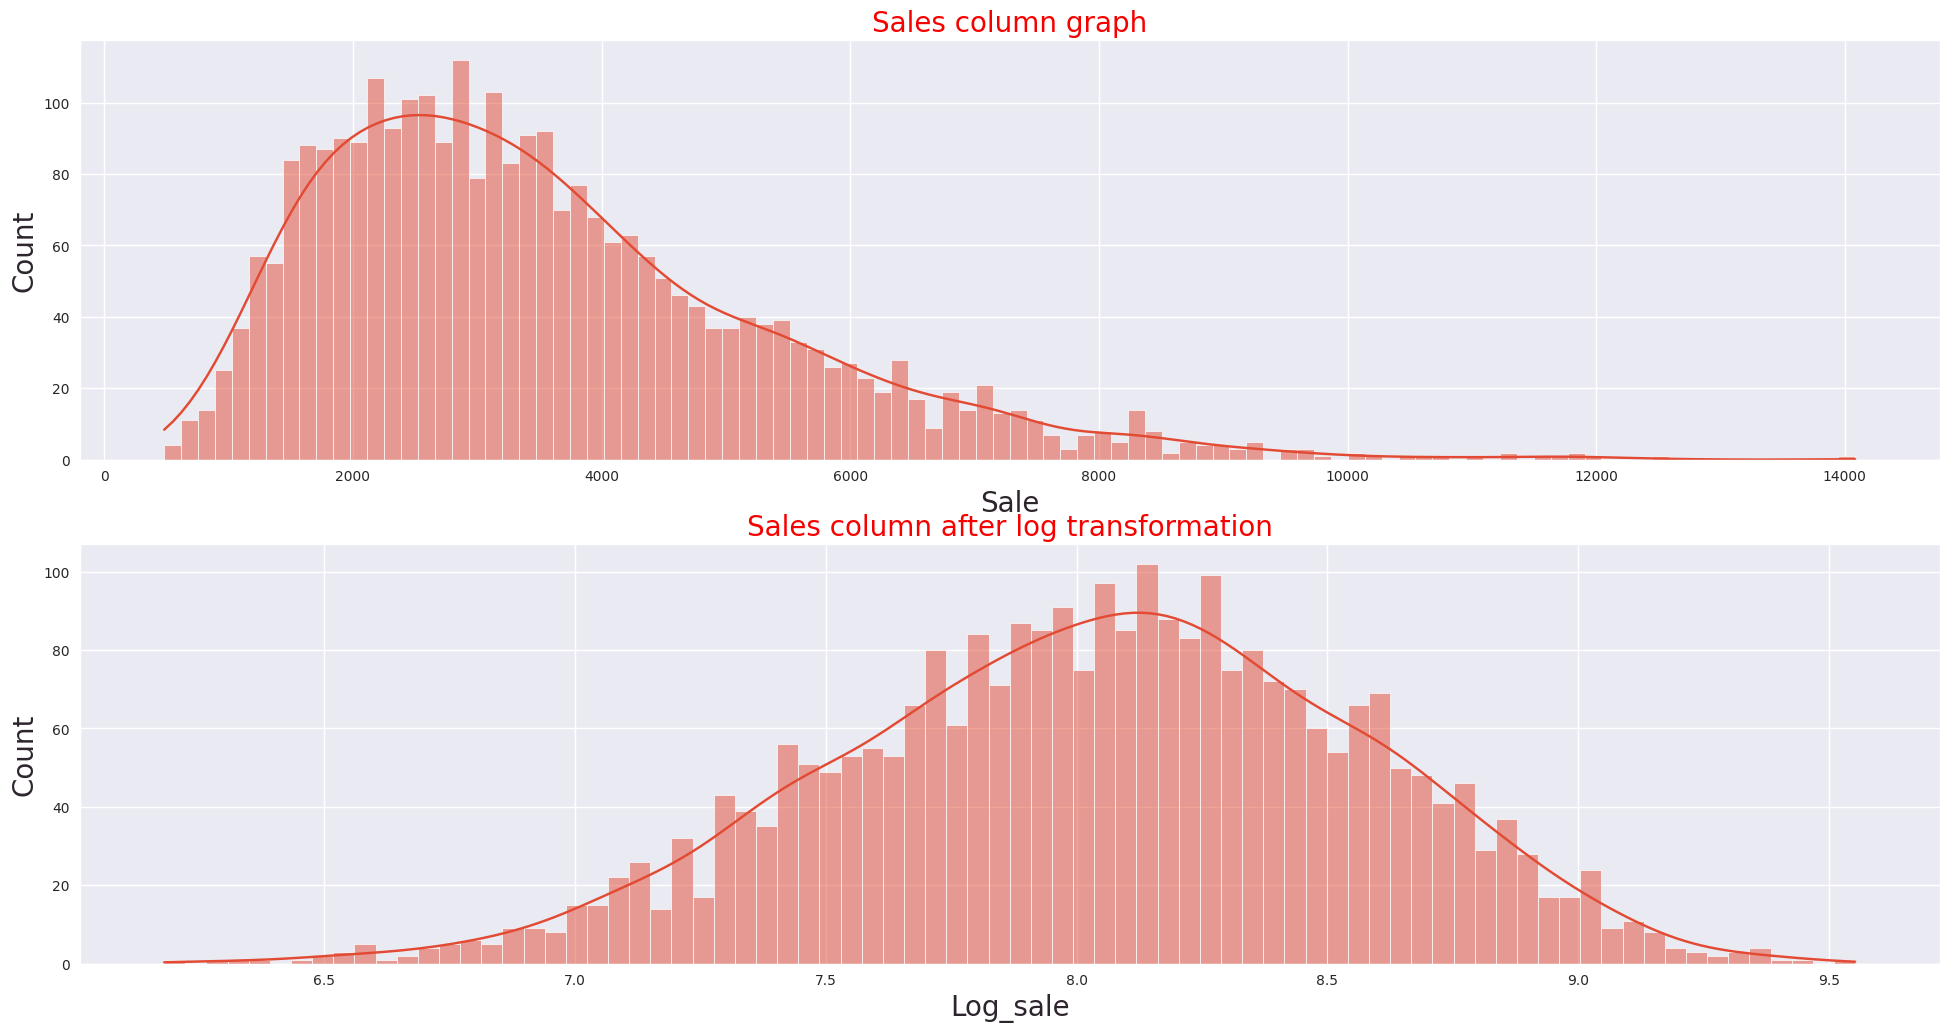

In [67]:
data['price_log'] = np.log(data['SALES']+1)
fig, axarr = plt.subplots(2, 1, figsize=(24, 12))

sns.histplot(data["SALES"], bins=100,kde=True,ax=axarr[0])
axarr[0].set_title("Sales column graph", color="#f60000", size=20)
axarr[0].set_ylabel('Count', fontsize = 20, color="#2d242e")
axarr[0].set_xlabel('Sale', fontsize = 20, color="#2d242e")

sns.histplot(data['price_log'], bins=80, kde=True, ax=axarr[1])
axarr[1].set_title("Sales column after log transformation", color="#f60000", size=20)
axarr[1].set_ylabel('Count', fontsize = 20, color="#2d242e")
axarr[1].set_xlabel('Log_sale', fontsize = 20, color="#2d242e")
fig.show()

In [68]:
print( 'excess kurtosis of normal distribution (should be 0): {}'.format( kurtosis(data["price_log"]) ))
print( 'skewness of normal distribution (should be 0): {}'.format( skew(data["price_log"]) ))

excess kurtosis of normal distribution (should be 0): -0.16961262504353725
skewness of normal distribution (should be 0): -0.20150542936667845


In [69]:
data_rfm = data.groupby(["CUSTOMERNAME"]).agg({
    "ORDERNUMBER" :"count",
    "SALES":  "sum",
    "recency_day":"min"})

data_rfm.rename(columns={'recency_day': 'Recency',
                   'ORDERNUMBER': 'Frequency',
                   'SALES': 'Monetary'}, inplace=True)

In [70]:
data_rfm.iloc[:5].style.background_gradient(cmap="Pastel1", low=0.50, high=1.0)

,Frequency,Monetary,Recency
CUSTOMERNAME,,,
"AV Stores, Co.",51,157807.810000,195
Alpha Cognac,20,70488.440000,570
Amica Models & Co.,26,94117.260000,264
"Anna's Decorations, Ltd",46,153996.130000,131
Atelier graphique,7,24179.960000,187


In [71]:
data_rfm["Recency"] = data_rfm["Recency"] .astype(int)

In [72]:
zamansallık = pd.qcut(data_rfm["Recency"], q = 5, labels = range(1,6)).astype(str)
sıklık = pd.qcut(data_rfm["Frequency"], q = 5,    labels = range(1,6)).astype(str)
parasallık = pd.qcut(data_rfm["Monetary"], q = 5, labels = range(1,6)).astype(str)

data_rfm["R"] = zamansallık
data_rfm["F"] = sıklık
data_rfm["M"] = parasallık
data_rfm["RFM_score"] = data_rfm["R"]+ data_rfm["F"] +data_rfm["M"]
data_rfm.iloc[:5].style.background_gradient(cmap="Pastel1", low=0.50, high=1.0)

,Frequency,Monetary,Recency,R,F,M,RFM_score
CUSTOMERNAME,,,,,,,
"AV Stores, Co.",51,157807.810000,195,3,5,5,355
Alpha Cognac,20,70488.440000,570,5,2,2,522
Amica Models & Co.,26,94117.260000,264,4,3,3,433
"Anna's Decorations, Ltd",46,153996.130000,131,1,5,5,155
Atelier graphique,7,24179.960000,187,2,1,1,211


In [73]:
data_rfm[["Frequency","Monetary", "Recency"]] = data_rfm[["Frequency","Monetary", "Recency"]].astype(float)

In [74]:
R = pd.DataFrame(data_rfm["R"].value_counts())
M = pd.DataFrame(data_rfm["M"].value_counts())
F = pd.DataFrame(data_rfm["F"].value_counts())

In [75]:

fig = make_subplots(rows=1, cols=3, specs=[[{"type": "pie"}, {"type": "pie"},{"type": "pie"}]])


fig.add_trace(go.Pie(
     values=[19,18,19,17,19],
     labels=["1","2","3","4","5"],
     domain=dict(x=[0, 0.5]),
     name="GHG Emissions",
     title="R(recency) distribution in customer segmentation"),
     row=1, col=1)

fig.add_trace(go.Pie(
     values=[19,18,18,18,19],
     labels=["1","2","3","4","5"],
     domain=dict(x=[0, 0.5]),
     name="GHG Emissions",
     title="M(mondetory) distribution in customer segmentation"),
     row=1, col=2)

fig.add_trace(go.Pie(
     values=[20,18,19,17,18],
     labels=["1","2","3","4","5"],
     domain=dict(x=[0, 0.5]),
     name="GHG Emissions",
     title="F(frequency) distribution in customer segmentation"),
     row=1, col=3)

fig.show()

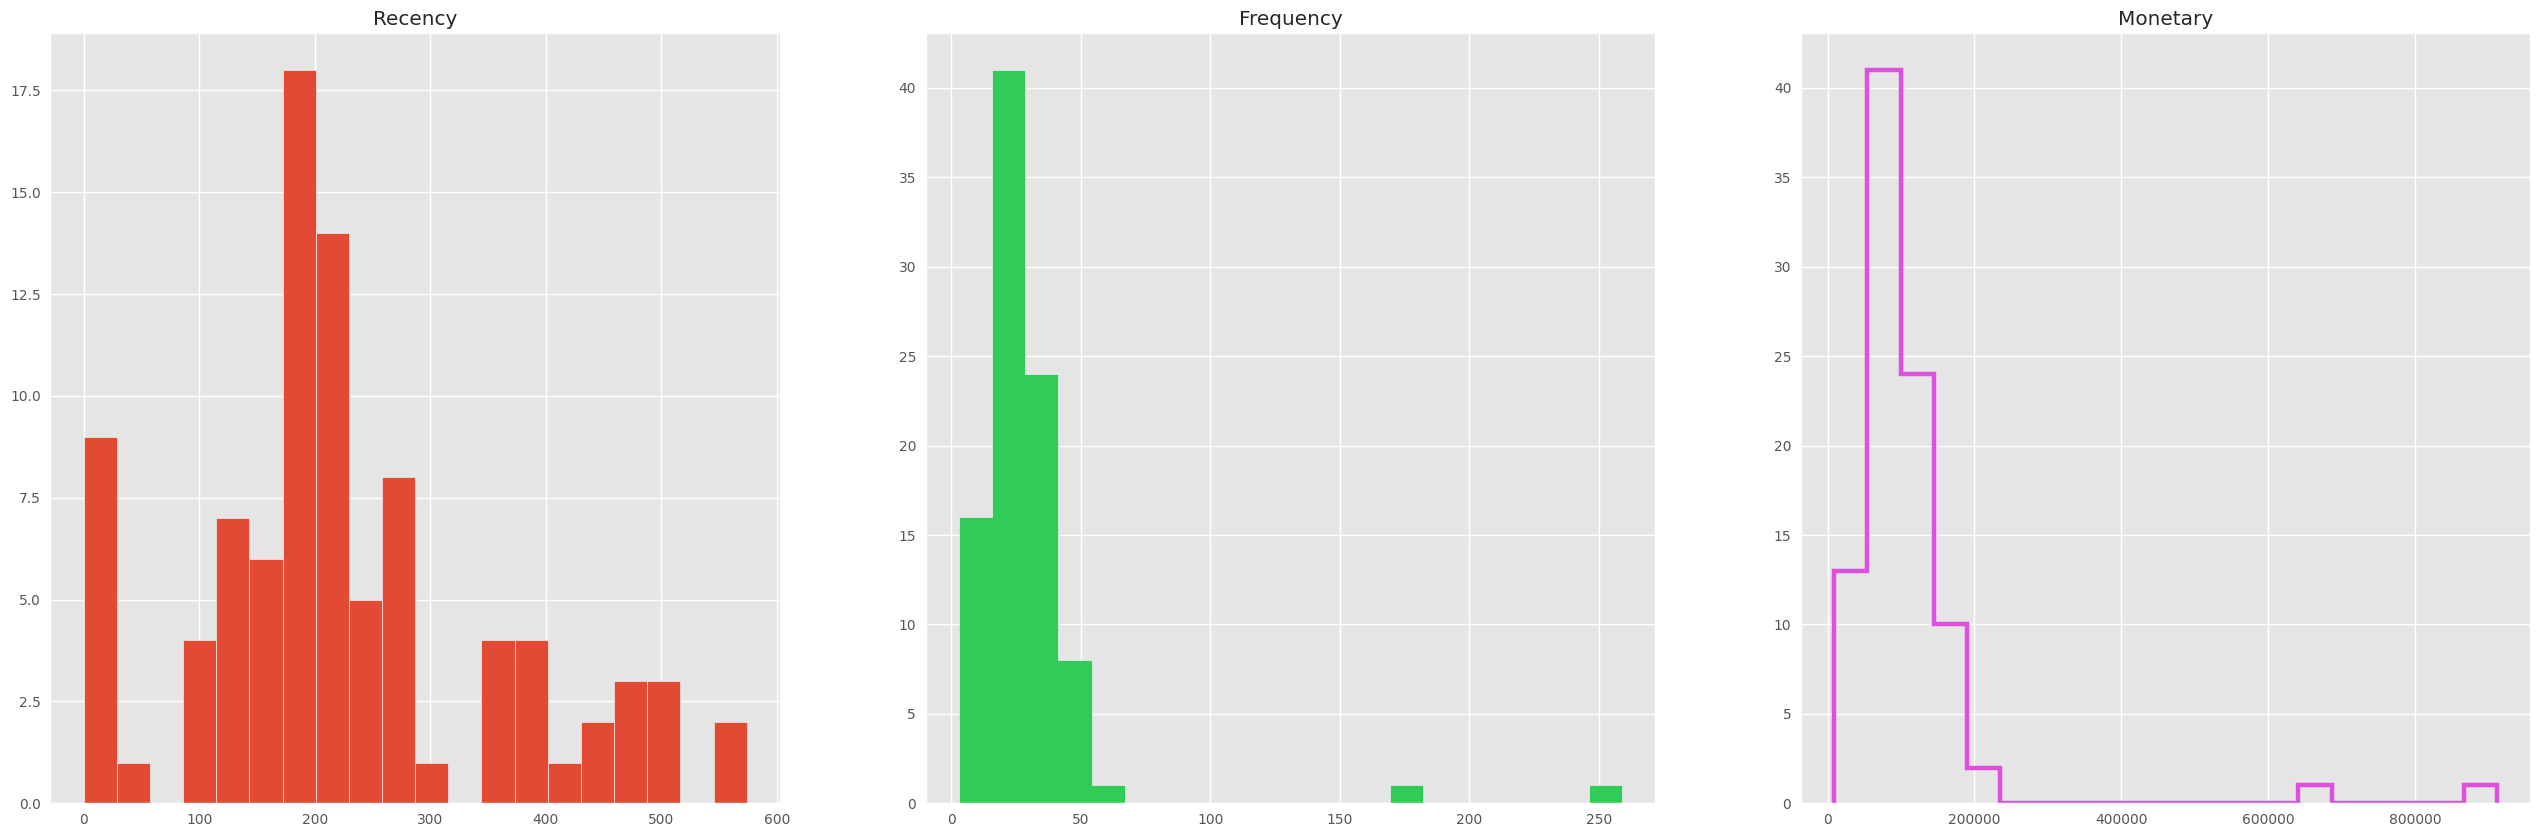

In [76]:
plt.style.use('ggplot')
fig, axarr = plt.subplots(1, 3, figsize=(32, 10))

axarr[0].hist(data_rfm['Recency'], bins=20, histtype= 'bar')
axarr[0].set_title("Recency")

axarr[1].hist(data_rfm['Frequency'], bins=20, histtype= 'stepfilled', color="#31CC57")
axarr[1].set_title("Frequency")

axarr[2].hist(data_rfm['Monetary'], bins=20,histtype= 'step', linewidth=3.2, color="#DE50DE")
axarr[2].set_title("Monetary")
plt.show()


In [77]:
data_rfm["Recency"] = np.log(data_rfm["Recency"]+1)
data_rfm["Frequency"] = np.log(data_rfm["Frequency"]+1)
data_rfm["Monetary"] = np.log(data_rfm["Monetary"]+1)

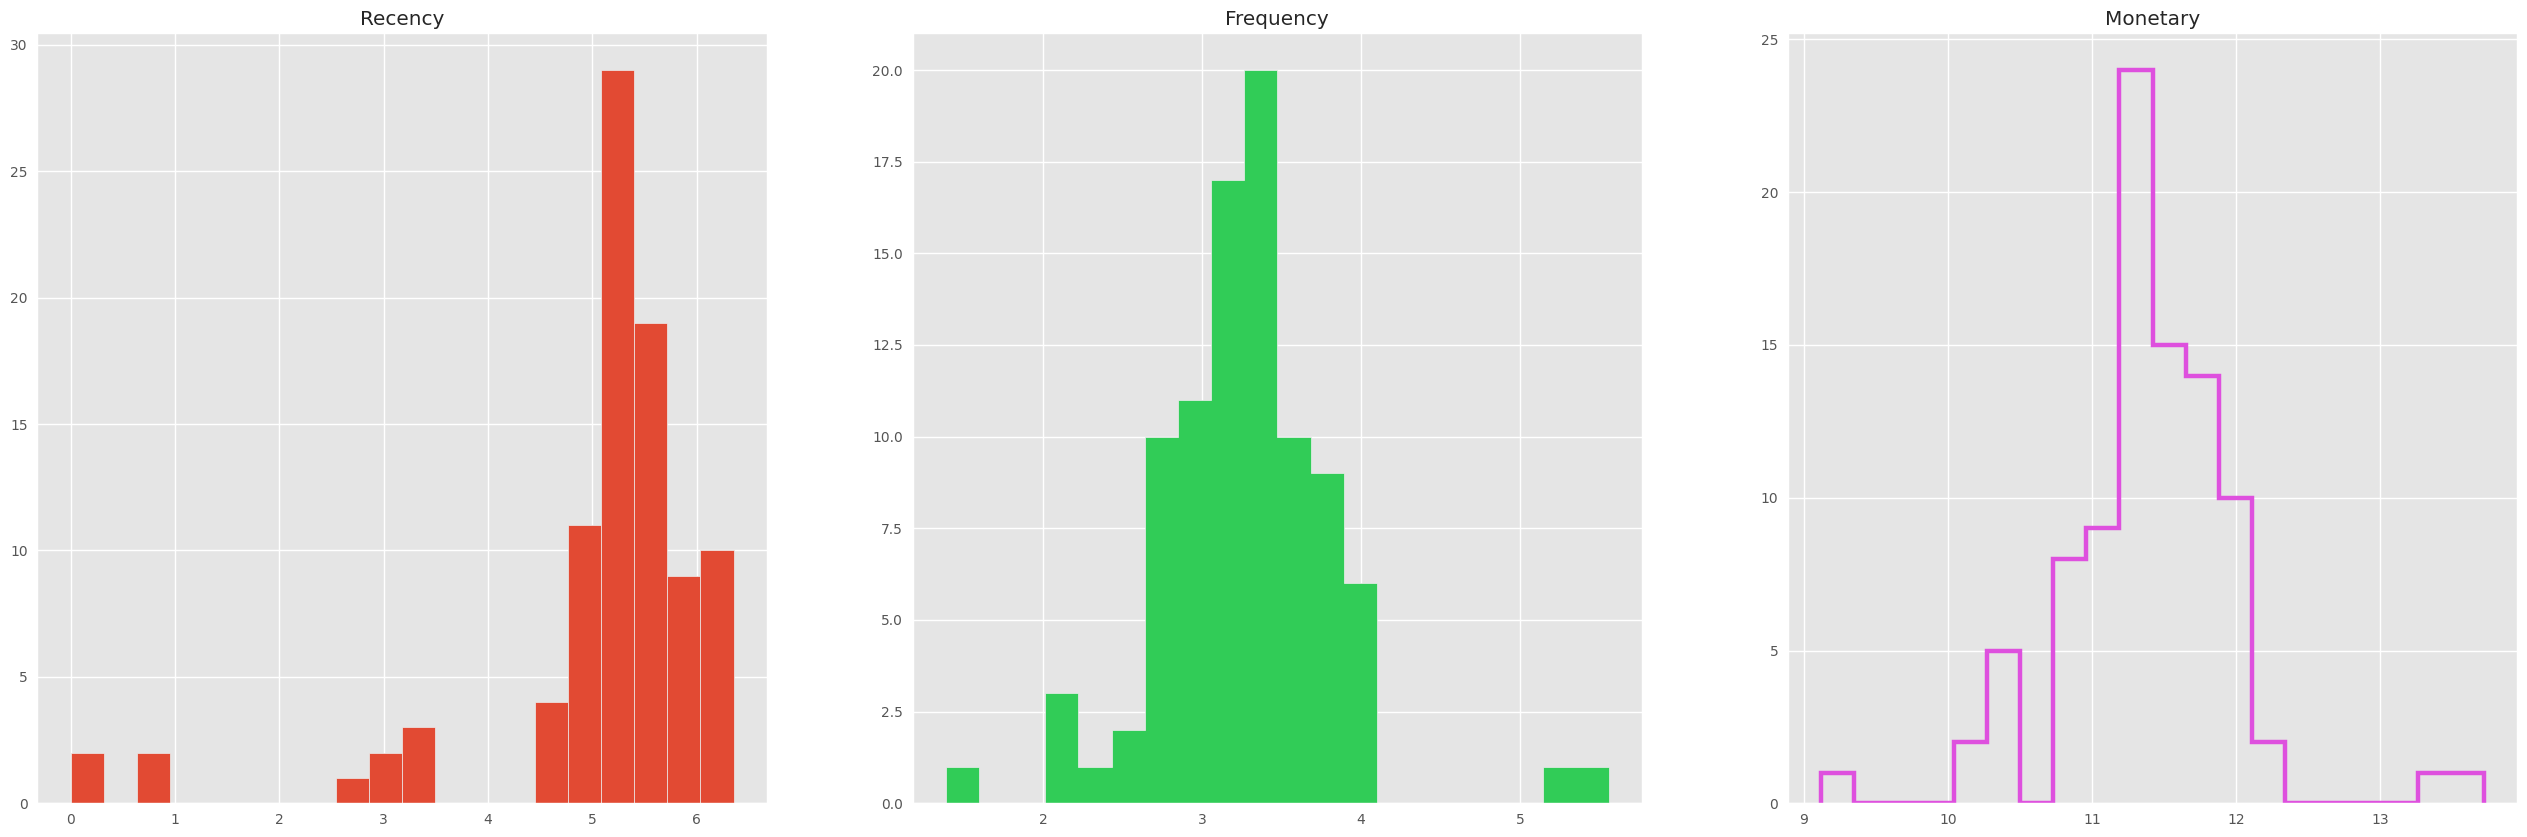

In [78]:
plt.style.use('ggplot')
fig, axarr = plt.subplots(1, 3, figsize=(32, 10))

axarr[0].hist(data_rfm['Recency'], bins=20, histtype= 'bar')
axarr[0].set_title("Recency")

axarr[1].hist(data_rfm['Frequency'], bins=20, histtype= 'stepfilled', color="#31CC57")
axarr[1].set_title("Frequency")

axarr[2].hist(data_rfm["Monetary"], bins=20,histtype= 'step', linewidth=3.2, color="#DE50DE")
axarr[2].set_title("Monetary")
plt.show()


In [79]:
data_rfm.iloc[:5].style.background_gradient(cmap="autumn_r", low=0.50, high=1.0)

,Frequency,Monetary,Recency,R,F,M,RFM_score
CUSTOMERNAME,,,,,,,
"AV Stores, Co.",3.951244,11.969140,5.278115,3,5,5,355
Alpha Cognac,3.044522,11.163218,6.347389,5,2,2,522
Amica Models & Co.,3.295837,11.452307,5.579730,4,3,3,433
"Anna's Decorations, Ltd",3.850148,11.944689,4.882802,1,5,5,155
Atelier graphique,2.079442,10.093321,5.236442,2,1,1,211


In [80]:
sc = StandardScaler()
scale_data =sc.fit_transform(data_rfm.iloc[:,:3])
scale_data = pd.DataFrame(scale_data, index = data_rfm.index, columns = ["Frequency", "Monetary", "Recency"])

In [81]:
temp  = pd.DataFrame(scale_data).describe().T
temp.style.background_gradient(cmap="autumn_r")

,count,mean,std,min,25%,50%,75%,max
Frequency,92.000000,0.000000,1.005479,-3.413681,-0.428362,0.049556,0.440181,4.157186
Monetary,92.000000,0.000000,1.005479,-3.817852,-0.393303,-0.040491,0.517077,3.916367
Recency,92.000000,0.000000,1.005479,-4.136017,-0.069299,0.209588,0.442908,1.049270


Elbow Method to determine the number of clusters to be formed:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

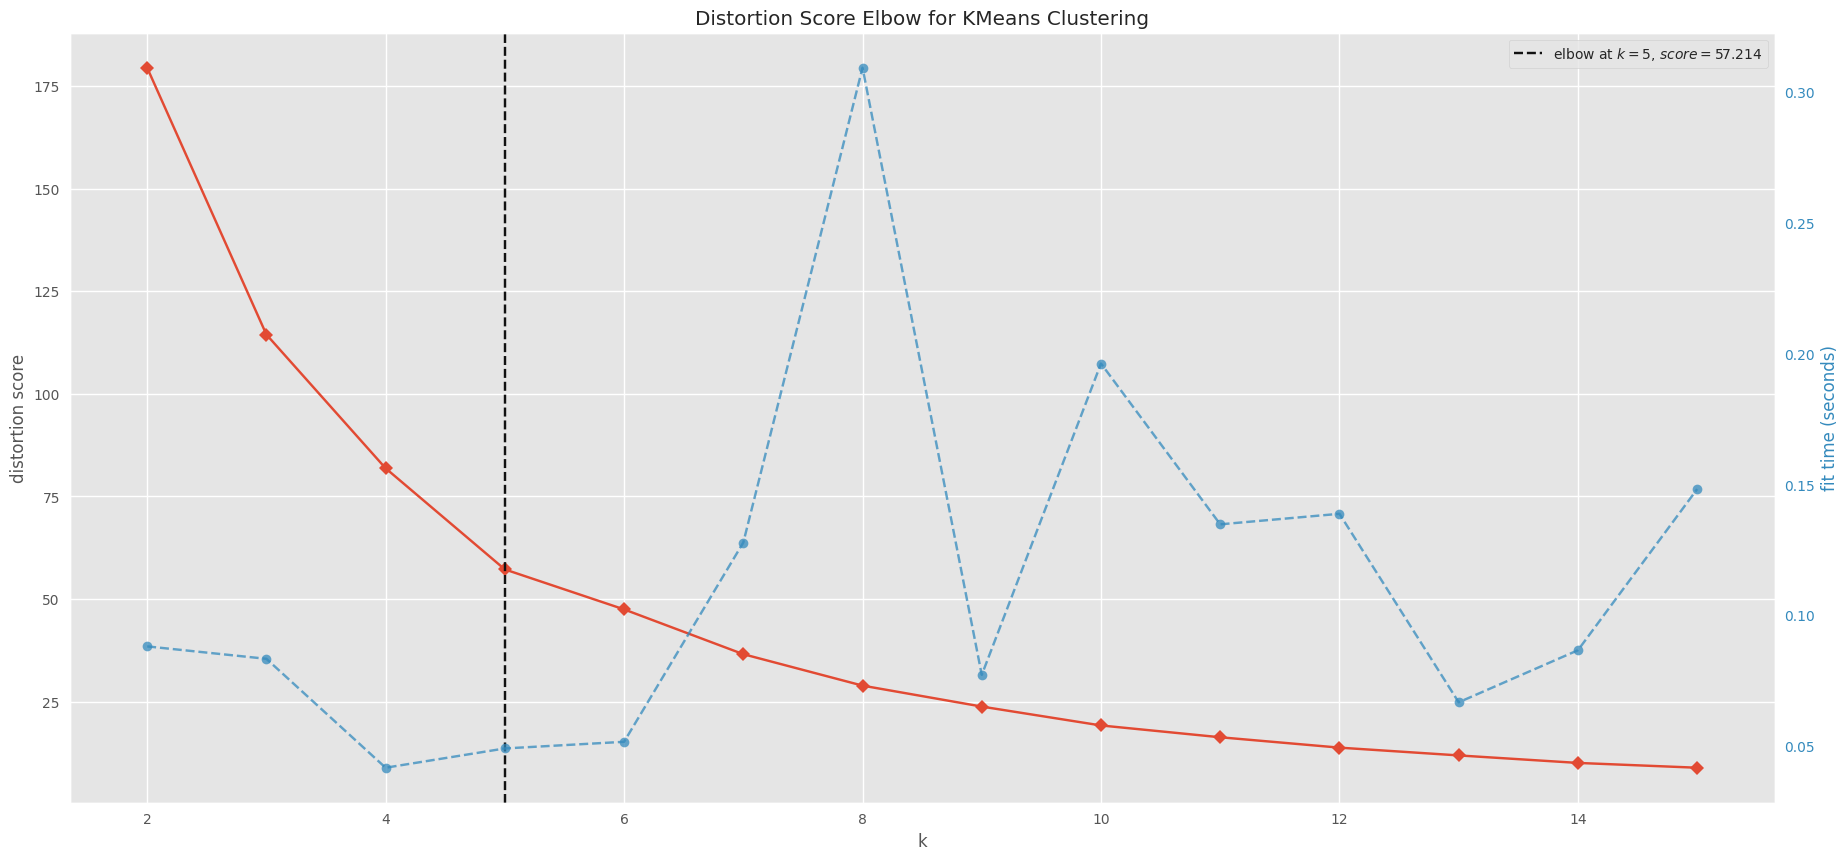

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [82]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=15)
plt.figure(figsize=(22,10))
Elbow_M.fit(scale_data)
Elbow_M.show()

In [83]:
kmeans = KMeans(n_clusters = 5, random_state = 1)
kmeans.fit(scale_data)
cluster_labels = kmeans.labels_
data_rfm = data_rfm.assign(Cluster=cluster_labels)
data_rfm.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,Frequency,Monetary,Recency,R,F,M,RFM_score,Cluster
CUSTOMERNAME,,,,,,,,
"AV Stores, Co.",3.951244,11.969140,5.278115,3,5,5,355,4
Alpha Cognac,3.044522,11.163218,6.347389,5,2,2,522,1
Amica Models & Co.,3.295837,11.452307,5.579730,4,3,3,433,1
"Anna's Decorations, Ltd",3.850148,11.944689,4.882802,1,5,5,155,4
Atelier graphique,2.079442,10.093321,5.236442,2,1,1,211,2


In [84]:
data_rfm["Recency"] = np.exp(data_rfm["Recency"])
data_rfm["Frequency"] = np.exp(data_rfm["Frequency"])
data_rfm["Monetary"] =np.exp(data_rfm["Monetary"])

In [85]:
data_rfm[["Frequency","Monetary", "Recency"]] = data_rfm[["Frequency","Monetary", "Recency"]].astype(float)
grouped = data_rfm.groupby(['Cluster'])

# Calculate average RFM values and segment sizes per cluster value
grouped.agg({
    'Recency': ['mean','std'],
    'Frequency': ['mean','std'],
    'Monetary': ['mean', 'count']
  }).round(1)

Recency        Frequency        Monetary      
           mean    std      mean   std      mean count
Cluster                                               
0          16.6   12.0      32.6  10.4  110393.9     9
1         257.8  101.7      23.2   3.9   79293.5    40
2         343.5  164.3      12.0   3.6   36909.3    13
3          52.5   72.8     220.5  55.9  783577.1     2
4         209.2   84.5      39.2   7.6  136445.1    28

In [86]:
data_dim = data.merge(data_rfm[['Cluster']], on="CUSTOMERNAME", how="left")

In [87]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label_data = ["PRODUCTCODE","CUSTOMERNAME","PHONE","ADDRESSLINE1","CITY",
              "POSTALCODE","CONTACTLASTNAME","COUNTRY","CONTACTLASTNAME",
              "CONTACTFIRSTNAME","DEALSIZE","recency_day","STATUS","PRODUCTLINE"]
for i in label_data:
    data[i] =  data[i].astype(str)
    data[i] = le.fit_transform(data[i].values)

data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,...,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,recency_day,price_log
0,10107,30,95.70,2,2871.00,5,1,2,2003,1,...,48,57,42,0,18,74,36,2,236,7.962764
1,10121,34,81.35,5,2765.90,5,2,5,2003,1,...,54,40,56,27,6,21,54,2,220,7.925483
2,10134,41,94.74,2,3884.34,5,3,7,2003,1,...,16,21,52,41,6,9,11,1,209,8.264966
3,10145,45,83.26,6,3746.70,5,3,8,2003,1,...,76,54,53,49,18,73,31,1,198,8.228898
4,10159,49,100.00,14,5205.27,5,4,10,2003,1,...,77,51,59,73,18,75,31,1,181,8.557619


In [88]:
#PCA
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
X_pca = pipe.fit_transform(data)

#t-sne
tsne = TSNE()
pipe = Pipeline([("scaler", StandardScaler()), ('tsne', tsne)])
X_tsne = pipe.fit_transform(data)

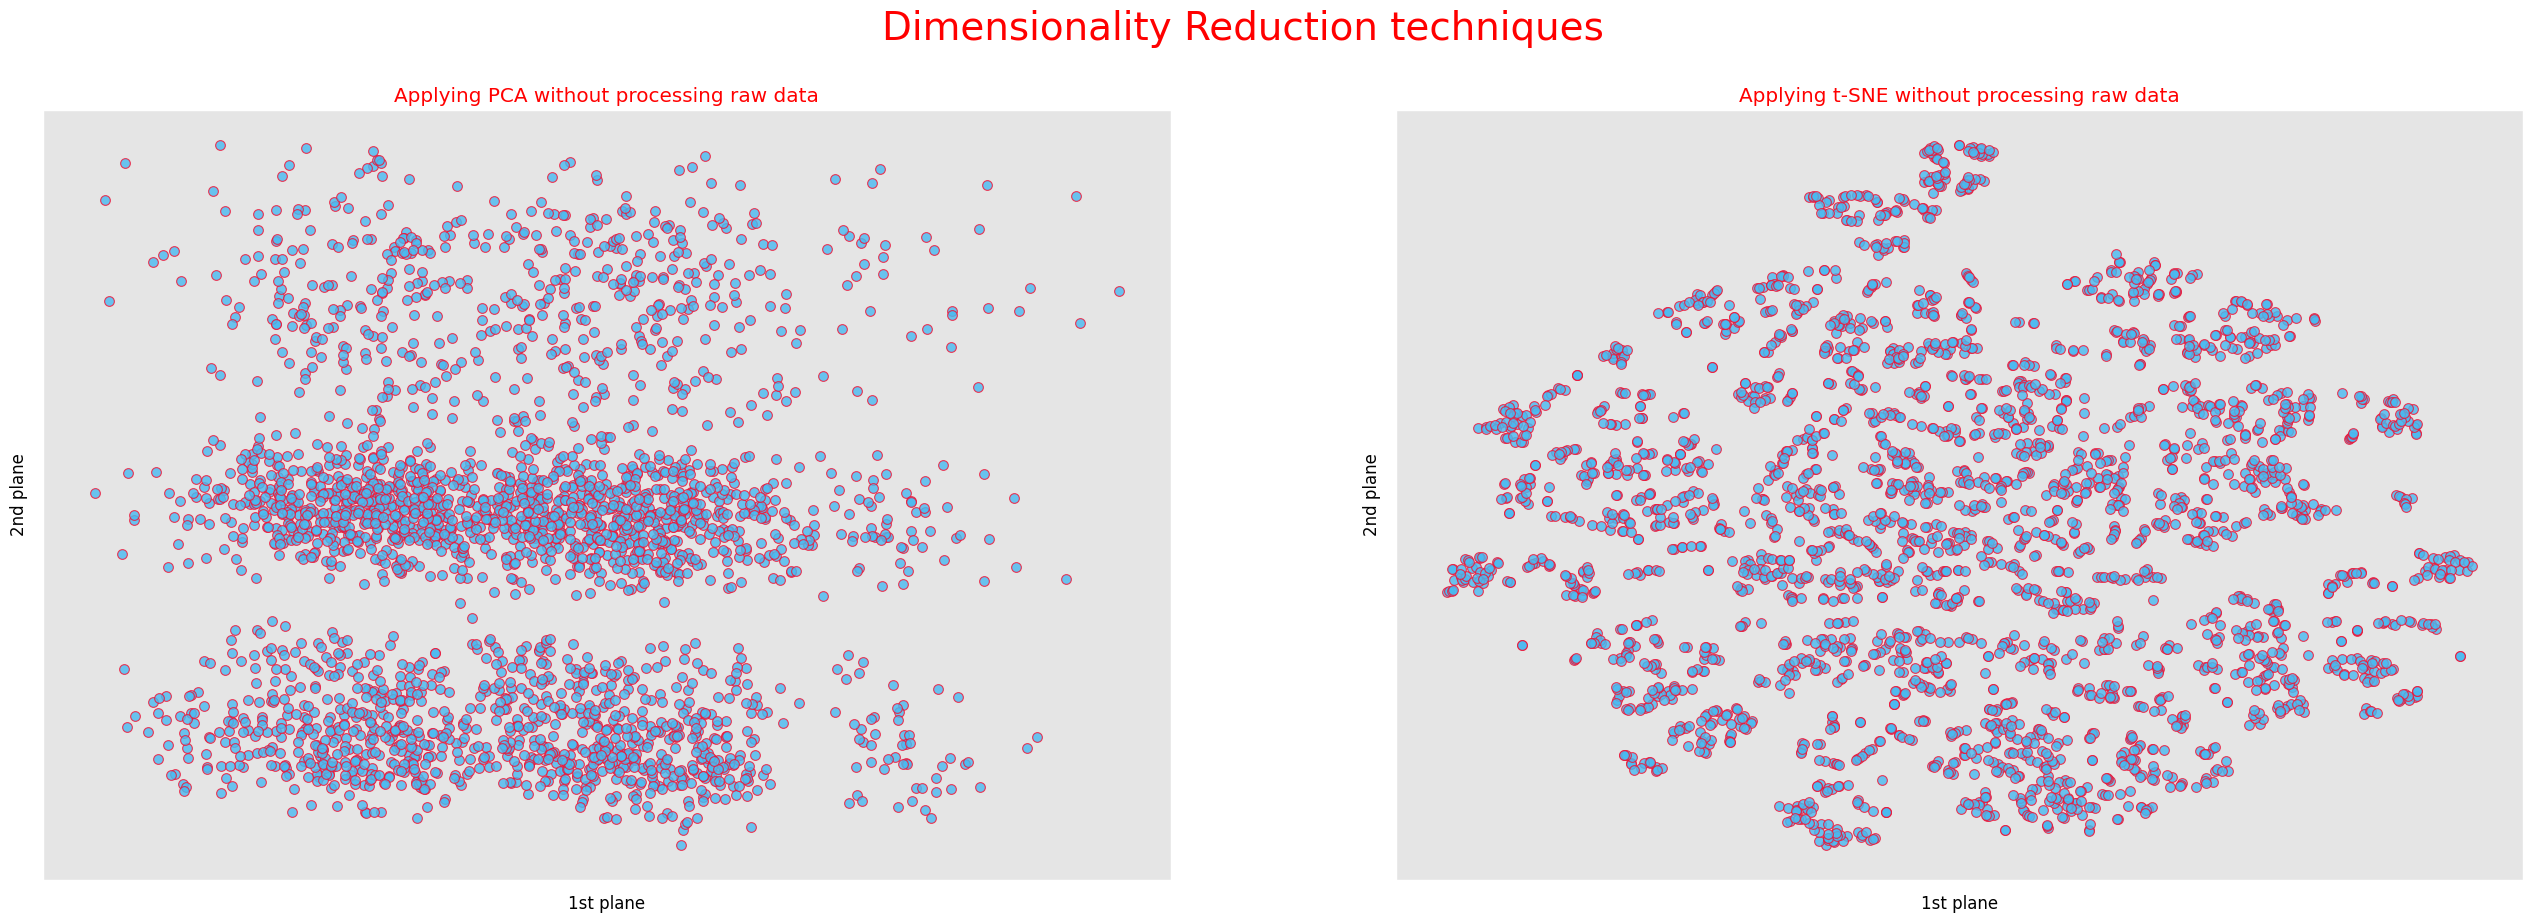

In [89]:
plt.style.use('ggplot')
fig, axarr = plt.subplots(1, 2, figsize=(32, 10))

fig.suptitle("Dimensionality Reduction techniques", color ="red", size = 28)
axarr[0].scatter(X_pca[:,0], X_pca[:,1],alpha=0.8,edgecolors="#F50D2F" ,linewidths=0.8, c="#49BAF1")
axarr[0].set_title("Applying PCA without processing raw data" ,color="red")
axarr[0].set_ylabel("2nd plane", color ="black")
axarr[0].set_xlabel("1st plane", color ="black")
axarr[0].set_yticklabels([])
axarr[0].set_xticklabels([])
axarr[0].grid(False)

axarr[1].scatter(X_tsne[:,0], X_tsne[:,1],alpha=0.8,edgecolors="#F50D2F" ,linewidths=0.8, c="#49BAF1")
axarr[1].set_title("Applying t-SNE without processing raw data" ,color="red")
axarr[1].set_ylabel("2nd plane", color ="black")
axarr[1].set_xlabel("1st plane", color ="black")
axarr[1].set_yticklabels([])
axarr[1].set_xticklabels([])
axarr[1].grid(False)
fig.show()


In [90]:

label_data = ["PRODUCTCODE","CUSTOMERNAME","PHONE","ADDRESSLINE1","CITY",
              "POSTALCODE","CONTACTLASTNAME","COUNTRY","CONTACTLASTNAME",
              "CONTACTFIRSTNAME","DEALSIZE","recency_day","STATUS","PRODUCTLINE"]
for i in label_data:
    data_dim[i] =  data_dim[i].astype(str)
    data_dim[i] = le.fit_transform(data[i].values)

y = data_dim["Cluster"]

#PCA
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
X_pca = pipe.fit_transform(data_dim.iloc[:,:23])

pipe = Pipeline([("scaler", StandardScaler()), ('tsne', tsne)])
X_tsne = pipe.fit_transform(data_dim.iloc[:,:23])

print(X_tsne.shape)

(2823, 2)


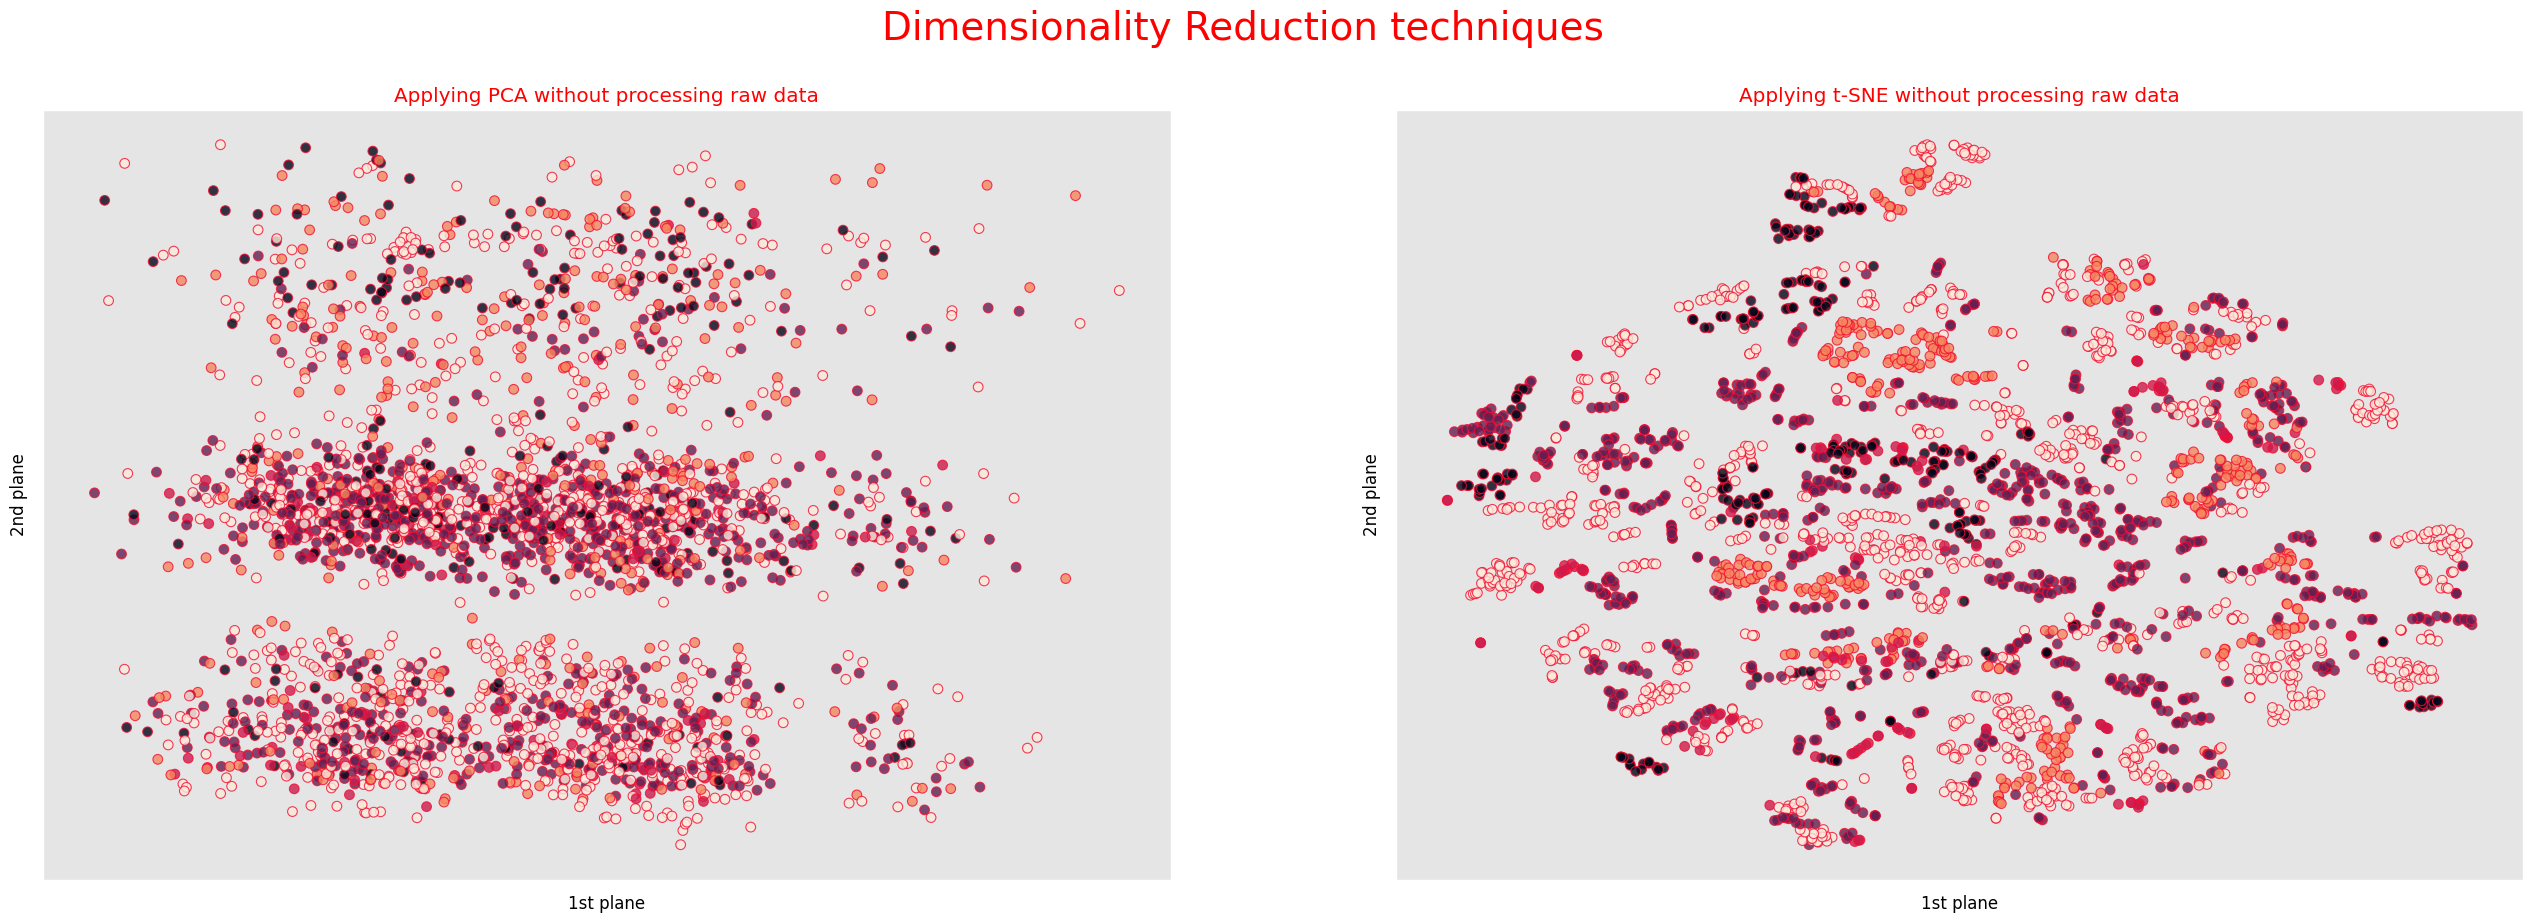

In [91]:
plt.style.use('ggplot')
fig, axarr = plt.subplots(1, 2, figsize=(32, 10))

fig.suptitle("Dimensionality Reduction techniques", color ="red", size = 28)
axarr[0].scatter(X_pca[:,0], X_pca[:,1],alpha=0.8,edgecolors="#F50D2F" ,linewidths=0.8, c=y)
axarr[0].set_title("Applying PCA without processing raw data" ,color="red")
axarr[0].set_ylabel("2nd plane", color ="black")
axarr[0].set_xlabel("1st plane", color ="black")
axarr[0].set_yticklabels([])
axarr[0].set_xticklabels([])
axarr[0].grid(False)

axarr[1].scatter(X_tsne[:,0], X_tsne[:,1],alpha=0.8,edgecolors="#F50D2F" ,linewidths=0.8, c=y)
axarr[1].set_title("Applying t-SNE without processing raw data" ,color="red")
axarr[1].set_ylabel("2nd plane", color ="black")
axarr[1].set_xlabel("1st plane", color ="black")
axarr[1].set_yticklabels([])
axarr[1].set_xticklabels([])
axarr[1].grid(False)
fig.show()